# 🏦 AtliQo Credit Card Launch — Phase 1  
### **Target Market Identification**

The Indian credit card market is rapidly growing, highly competitive, and driven by diverse customer behaviors.  
AtliQo Bank aims to launch a new credit card product, but before launch, it is critical to identify:

- **Who are the right customers to target?**  
- **How do income, age, occupation, and credit profiles affect customer eligibility?**  
- **Which customer segments show strong credit behavior?**  
- **How do financial and demographic patterns influence card adoption?**

Phase 1 of this project focuses on **understanding customer data**, **cleaning and standardizing it**, and performing **exploratory analysis** to build a clear, data-backed target persona for AtliQo’s credit card launch.


## **Importing Libraries**
This section securely loads data from MySQL using `.env` variables and establishes the foundation for analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from dotenv import load_dotenv
import os
import warnings
warnings.filterwarnings("ignore")

## **Data Extraction (MySQL + Python)**
- Secure MySQL → Python using environment variables

This section securely loads data from MySQL using `.env` variables and establishes the foundation for analysis.

In [4]:
load_dotenv()

# Connect using environment variables
conn = mysql.connector.connect(
    host    = os.getenv("MYSQL_HOST"),
    user    = os.getenv("MYSQL_USER"),
    password= os.getenv("MYSQL_PASSWORD"),
    database= os.getenv("MYSQL_DATABASE")
)

print("Connected to:", conn)

Connected to: <mysql.connector.connection_cext.CMySQLConnection object at 0x000001C6036F0440>


## 📊 Dataset Overview  
This project uses three anonymized datasets representing real-world customer profiles, credit bureau information, and transaction patterns.

### **1️⃣ Customers Dataset**
Contains demographic and socioeconomic details:
- `cust_id`  
- `name`   
- `gender` 
- `age`   
- `location`   
- `occupation`  
- `annual_income` 
- `marital_status`   

**Purpose:**  
To understand demographic segmentation, income distribution, and target audiences.

In [5]:
df_customers = pd.read_sql("SELECT * FROM customers;", conn)
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


### **2️⃣ Transactions Dataset**
Contains platform-wise spending behavior:
- `tran_id`  
- `cust_id`  
- `tran_date`   
- `tran_amount`  
- `platform`  
- `product_category` 
- `payment_type` 

**Purpose:**  
To understand spending preferences and behavioral patterns for product design.

In [6]:
df_transactions = pd.read_sql("SELECT * FROM transactions;", conn)
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


### **3️⃣ Credit Profile Dataset**
Contains financial and credit-worthiness indicators:
- `cust_id`   
- `credit_score`   
- `credit_utilisation`  
- `outstanding_debt`  
- `credit_inquiries_last_6_months`  
- `credit_limit` 

**Purpose:**  
To evaluate customer risk, credit behavior, and credit eligibility.

In [7]:
df_credit_profiles = pd.read_sql("SELECT * FROM credit_profiles;", conn)
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


### ✨ Why These Datasets Matter?

Together, these three datasets allow us to answer:

- Who earns enough to qualify for a credit card?  
- Who uses digital payments more?  
- Which age or job group shows responsible credit behavior?  
- Which customer categories align with AtliQo’s credit product strategy?

These insights build the foundation for **Phase 2 (Hypothesis Testing + A/B Testing)**.

## **Data Cleaning**
   - Handling missing values **(median/mode group-wise)**. 
   - Outlier treatment occupation-wise **(IQR + median logic)**.
   - Credit score range binning  
   - Ensuring consistency across datasets
     


In [8]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [9]:
df_customers.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [10]:
# displying to all null values containg
df_customers[df_customers.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married
155,156,Krishna Trivedi,Male,24,City,Fullstack Developer,NaN,Married


In [11]:
df_customers.occupation.unique().tolist()

['Business Owner',
 'Consultant',
 'Freelancer',
 'Fullstack Developer',
 'Accountant',
 'Data Scientist',
 'Artist']

In [12]:
df_customers[df_customers.occupation == "Artist"].annual_income.median()

np.float64(45794.0)

In [13]:
# using occupation wise annual income
occupation_wise_inc_median=df_customers.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [14]:

def get_median_vale(row):
    if pd.isnull(row["annual_income"]):
        return occupation_wise_inc_median[row["occupation"]]
    else:
        return row["annual_income"]

In [15]:
df_customers["annual_income"] = df_customers.apply(
    lambda row: occupation_wise_inc_median[row["occupation"]] if pd.isnull(row["annual_income"]) else row["annual_income"],
    axis=1
)

In [16]:
df_customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [17]:
# cross checking 
df_customers.iloc[[14,82,102,101]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,45794.0,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,46759.0,Single
102,103,Pooja Ganguly,Male,32,City,Data Scientist,135759.0,Married
101,102,Avyanna Patel,Male,42,City,Consultant,53075.0,Married


### **Data Cleaning : Treat Outliers(Annual Income)**

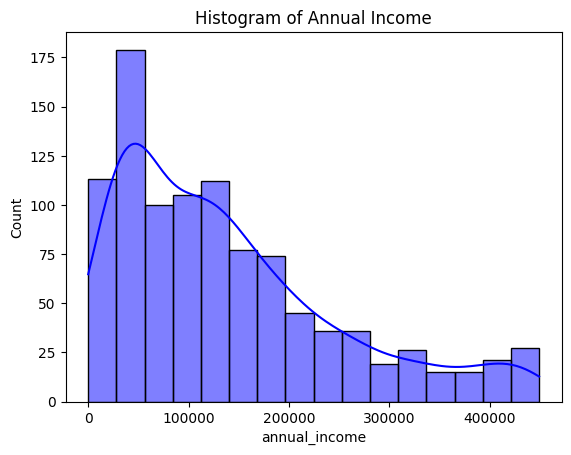

In [18]:
sns.histplot(df_customers["annual_income"], kde= True, color="blue", label="Data")
plt.title("Histogram of Annual Income")
plt.show()

In [19]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [20]:
df_customers[df_customers.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,50.0,Married
262,263,Veer Rathod,Male,53,Suburb,Business Owner,50.0,Married
316,317,Avinash Chauhan,Male,47,City,Consultant,50.0,Married
333,334,Samaira D'Souza,Female,29,City,Data Scientist,50.0,Married
340,341,Ridhi Rastogi,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Gauri Gupta,Male,54,City,Consultant,2.0,Married
592,593,Vivaan Pande,Female,32,City,Business Owner,50.0,Married
633,634,Aradhya Pandey,Male,26,City,Data Scientist,2.0,Married
686,687,Gauri Nanda,Male,40,City,Business Owner,2.0,Married
696,697,Avani Lalwani,Male,47,City,Consultant,20.0,Married


In [21]:
df_customers["annual_income"] = df_customers.apply(
    lambda row: occupation_wise_inc_median[row["occupation"]] if row["annual_income"]<100 else row["annual_income"],
    axis=1
)

In [22]:
df_customers[df_customers.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [23]:
df_customers.loc[[31,333]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,261191.5,Married
333,334,Samaira D'Souza,Female,29,City,Data Scientist,135759.0,Married


### **Data Visualization : Annual income**

In [24]:
avg_income_per_ocuupation = df_customers.groupby("occupation")["annual_income"].mean()
avg_income_per_ocuupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [25]:
avg_income_per_ocuupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [26]:
avg_income_per_ocuupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

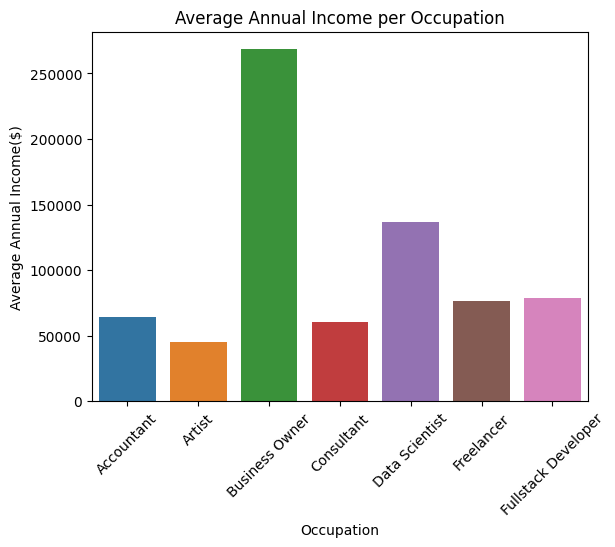

In [27]:
sns.barplot(x=avg_income_per_ocuupation.index ,y=avg_income_per_ocuupation.values, palette="tab10")
plt.xticks(rotation = 45)
plt.title("Average Annual Income per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Annual Income($)")
plt.show()

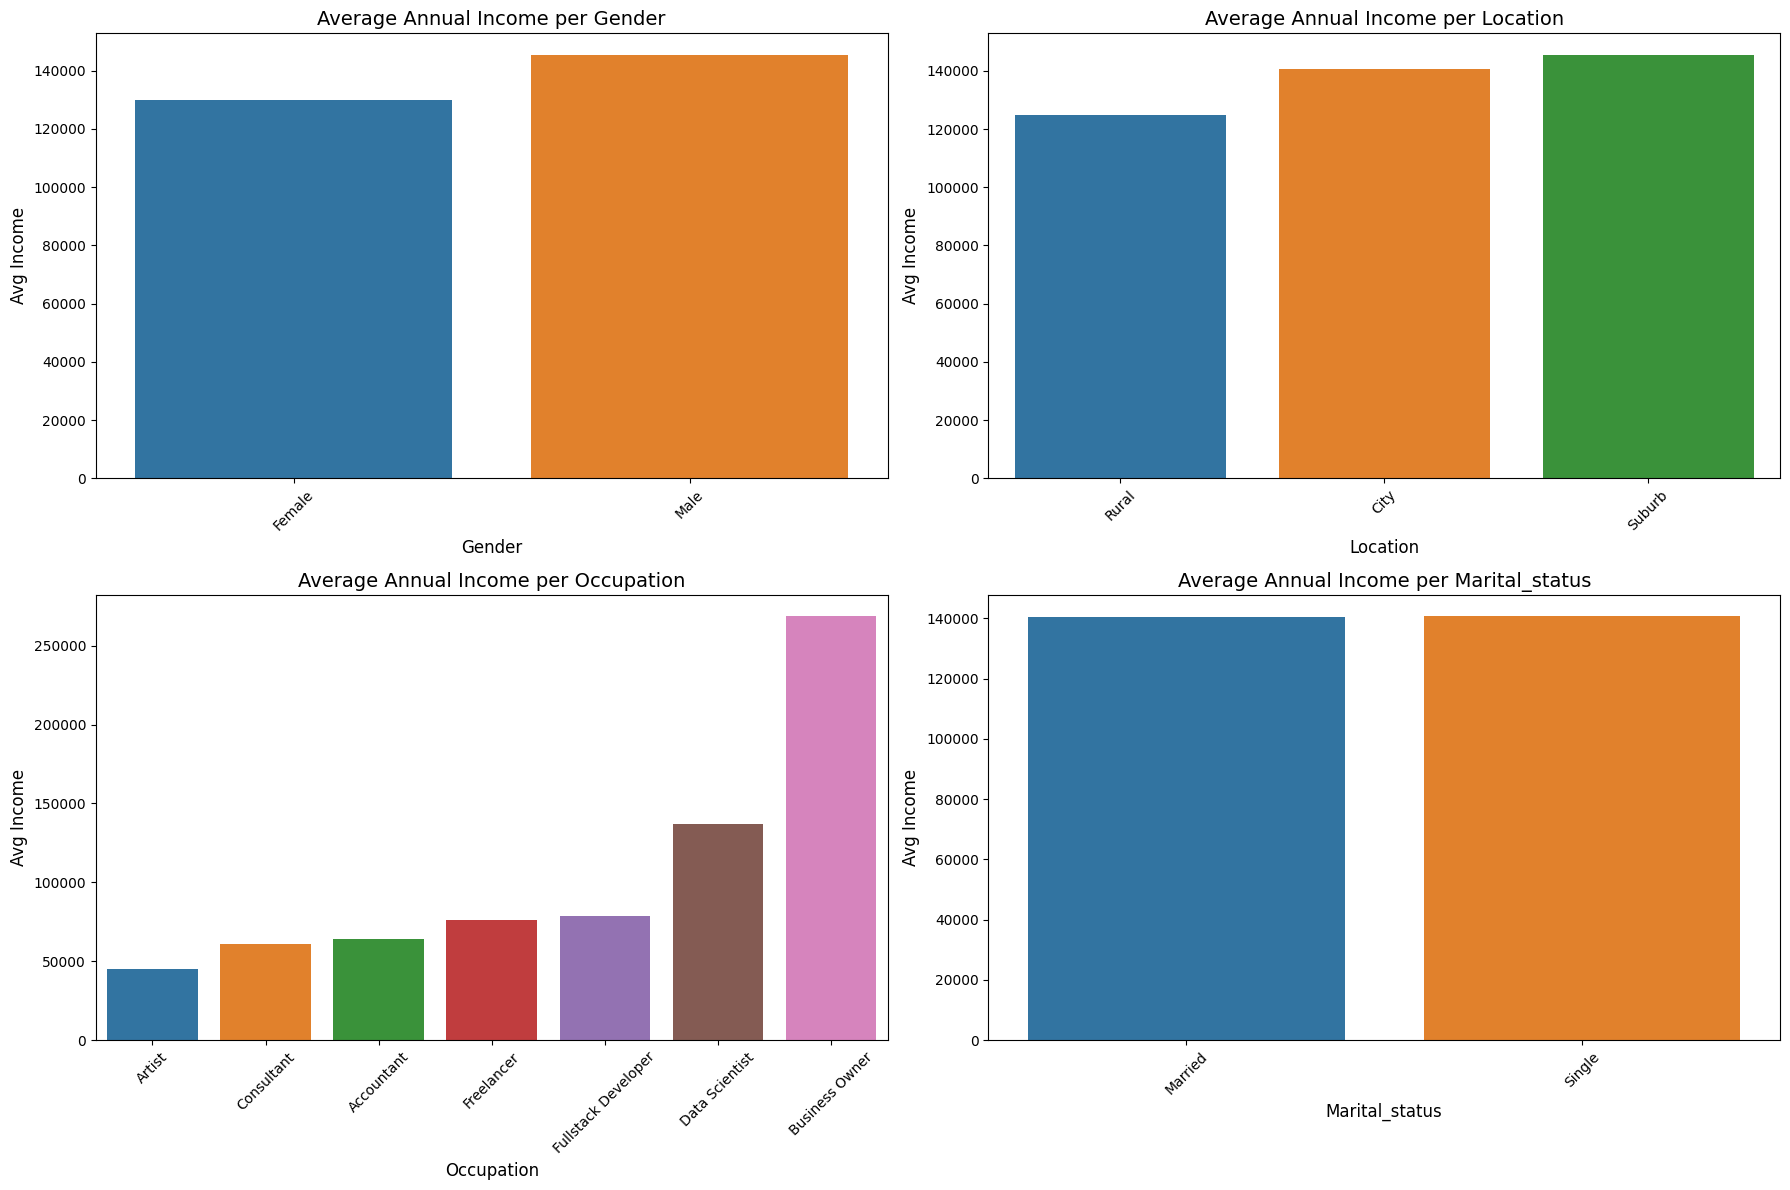

In [28]:

categorical_columns = ["gender", "location", "occupation", "marital_status"]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()   

for i, col in enumerate(categorical_columns):
    avg_income_per_group = df_customers.groupby(col)["annual_income"].mean().sort_values()

    sns.barplot(
        x=avg_income_per_group.index,
        y=avg_income_per_group.values,
        palette="tab10",
        ax=axes[i]
    )
    
    axes[i].set_title(f"Average Annual Income per {col.capitalize()}", fontsize=14)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].set_ylabel("Avg Income", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **Data Cleaning : Treat Outlires in Age column**

In [29]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


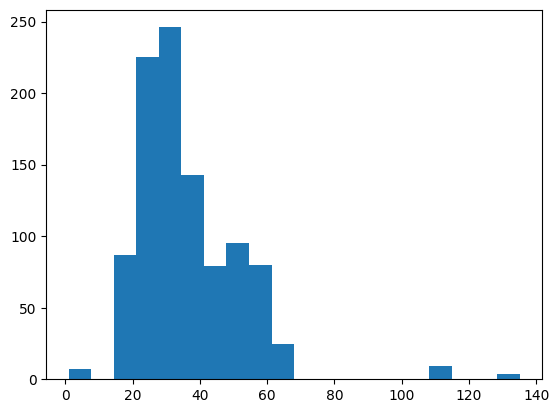

In [30]:
plt.hist(df_customers.age, bins = 20)
plt.show()

In [31]:
df_customers[(df_customers.age < 15) | (df_customers.age > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,110,City,Artist,7621.0,Married
165,166,Swara Mehtani,Female,1,City,Freelancer,39721.0,Single
174,175,Sneha Jaiswal,Male,110,City,Freelancer,23723.0,Married
222,223,Aaryan Bajaj,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Amaira Dewan,Male,110,City,Consultant,96522.0,Single
295,296,Veer Anand,Male,1,Rural,Accountant,55254.0,Married
325,326,Yash Chatterjee,Male,110,City,Accountant,61021.0,Single
610,611,Advait Mangal,Male,135,Rural,Business Owner,444776.0,Married
692,693,Aarohi Dubey,Male,1,City,Business Owner,83045.0,Married


In [32]:
occupation_age_median =df_customers.groupby("occupation")["age"].median()
occupation_age_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [33]:
df_customers["age"] = df_customers.apply(
    lambda row: occupation_age_median[row["occupation"]] 
    if (row["age"]<15) or (row["age"]>80) 
    else row["age"],
    axis = 1   
)

In [34]:
df_customers[(df_customers.age < 15) | (df_customers.age > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [35]:
df_customers.loc[[0,41,222]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,26.0,City,Artist,7621.0,Married
222,223,Aaryan Bajaj,Male,24.0,Suburb,Freelancer,210987.0,Married


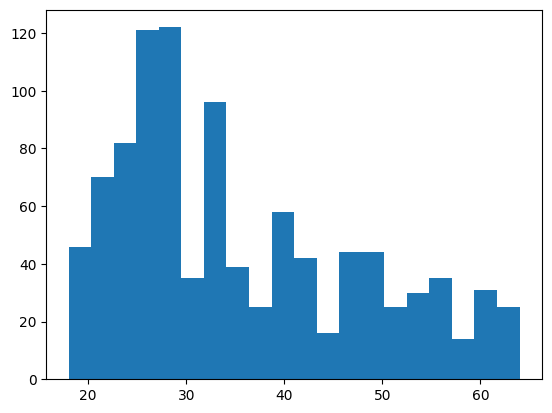

In [36]:
plt.hist(df_customers.age, bins = 20)
plt.show()

### **Data Visualization : Age, Gender, Location**

In [37]:
bins_edge = [17, 25, 48, 65]
bin_labels =["18-25", "26-48", "49-65"]
df_customers["age_group"]= pd.cut(df_customers["age"], bins= bins_edge, labels=bin_labels)

In [38]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48


In [39]:
age_group_per_count =df_customers["age_group"].value_counts(normalize=True)*100
age_group_per_count

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

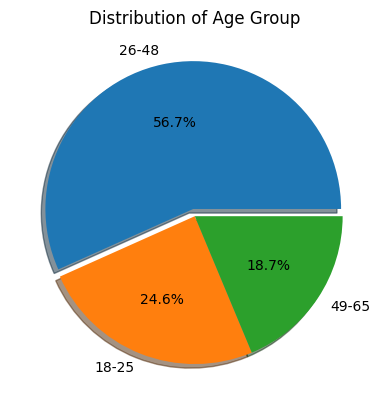

In [40]:
plt.pie(age_group_per_count, 
        labels=age_group_per_count.index, 
        autopct="%1.1f%%",
       shadow=True,
       explode=(0.05,0,0))
plt.title("Distribution of Age Group")
plt.show()

In [41]:
df_customers["location"].value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [42]:
df_customers["gender"].value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [43]:
customer_gdr_location=df_customers.groupby(["location","gender"]).size().unstack()
customer_gdr_location

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


<Figure size 800x400 with 0 Axes>

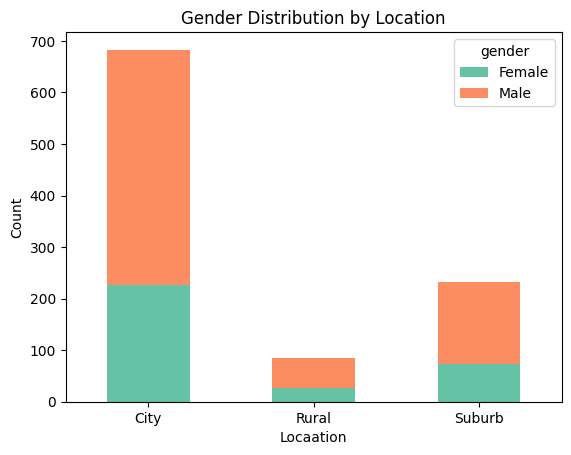

In [44]:
plt.figure(figsize=(8,4))
customer_gdr_location.plot(
    kind="bar",
    stacked=True ,
    color=sns.color_palette("Set2")
)

plt.title("Gender Distribution by Location")
plt.xlabel("Locaation")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

<h2 style="text-align:center;">Exploring Credit Score Table</h2>

In [45]:
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [46]:
df_credit_profiles.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 4
outstanding_debt                   4
credit_inquiries_last_6_months     4
credit_limit                      69
dtype: int64

In [47]:
df_credit_profiles.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [48]:
df_credit_profiles[df_credit_profiles["credit_utilisation"].isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
569,569,344,NaN,NaN,NaN,NaN
607,606,734,NaN,NaN,NaN,NaN
664,662,442,NaN,NaN,NaN,NaN


In [49]:
df_credit_profiles[df_credit_profiles[["credit_utilisation","outstanding_debt","credit_inquiries_last_6_months","credit_limit"]].isna().any(axis=1)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


### **Data Cleaning : Credit Score Table**

In [50]:
df_credit_profiles["cust_id"].nunique()

1000

In [51]:
df_customers.shape

(1000, 9)

In [52]:
df_credit_profiles.shape

(1004, 6)

In [53]:
df_credit_profiles[df_credit_profiles["cust_id"].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [54]:
credit_profile_clean = df_credit_profiles.drop_duplicates(subset = "cust_id", keep= "last")
credit_profile_clean.shape

(1000, 6)

In [55]:
credit_profile_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [56]:
credit_profile_clean[credit_profile_clean["credit_limit"].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


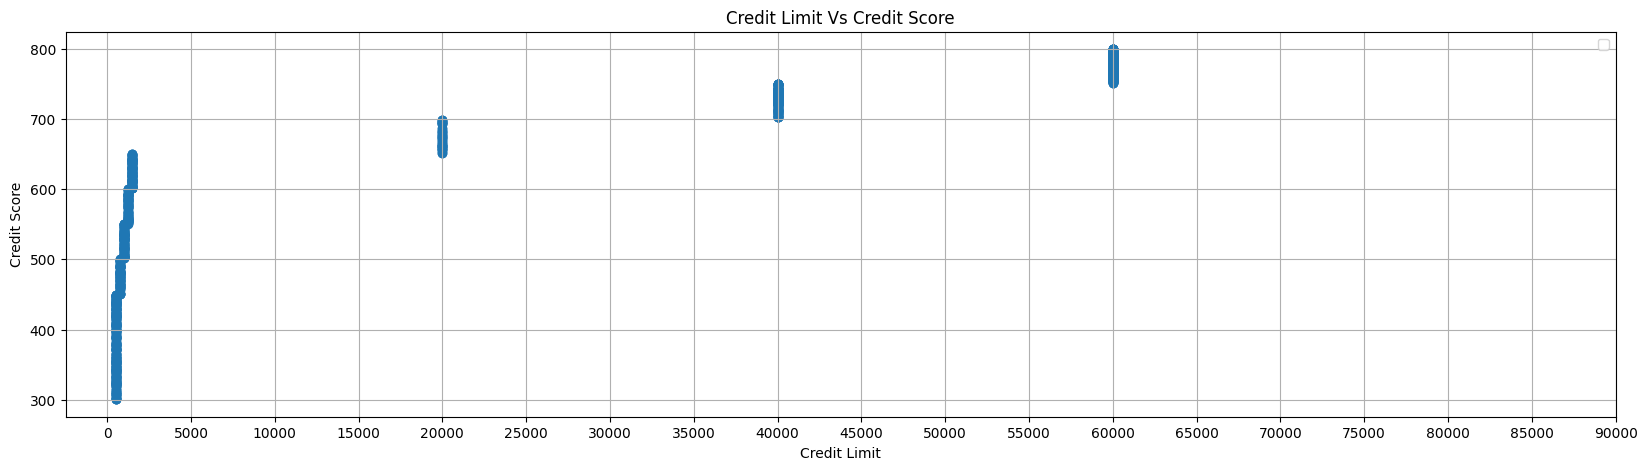

In [57]:
plt.figure(figsize=(20,5))
plt.scatter(credit_profile_clean.credit_limit, credit_profile_clean.credit_score)
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")
plt.title("Credit Limit Vs Credit Score")
plt.xticks(range(0, 90001, 5000))
plt.grid(True)
plt.legend()
plt.show()

In [58]:
bins_range = [300, 450, 500, 550, 600, 650, 700, 750, 800]
bins_labels = [f"{start}-{end-1}" for start, end in zip(bins_range, bins_range[1:]) ]
bins_labels

['300-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [59]:
credit_profile_clean["credit_score_range"] = pd.cut(credit_profile_clean["credit_score"], bins= bins_range, labels= bins_labels, include_lowest= True, right=False)
credit_profile_clean.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [60]:
credit_profile_clean[credit_profile_clean["credit_score_range"].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [61]:
credit_limit_mode = credit_profile_clean.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0])
credit_limit_mode

credit_score_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

In [62]:
credit_profile_clean["credit_limit"] =credit_profile_clean.apply(
    lambda row:credit_limit_mode[row["credit_score_range"]] if pd.isnull(row["credit_limit"]) else row["credit_limit"],
    axis =1
)

In [63]:
credit_profile_clean[credit_profile_clean["credit_limit"].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [64]:
credit_profile_clean.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [65]:
credit_profile_clean.loc[[10,35,45,517,570]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,20000.0,650-699
35,36,790,0.112535,4261.0,1.0,60000.0,750-799
45,46,761,0.596041,24234.0,2.0,60000.0,750-799
517,517,308,0.113860,33.0,3.0,500.0,300-449
570,569,344,0.112599,37.0,0.0,500.0,300-449


### **Data Cleaning : Treat Outliers (Outstanding Debt)**
#### user debt cannot cannot be more than credit limt

In [66]:
credit_profile_clean.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


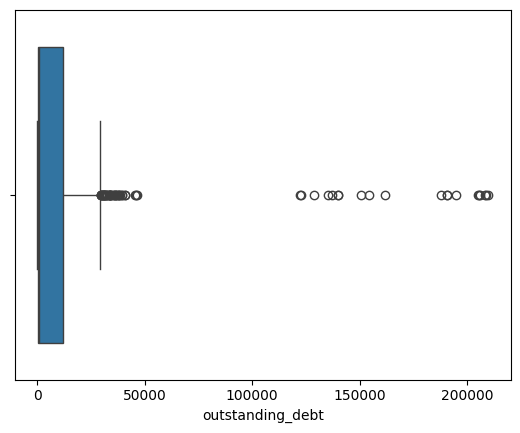

In [67]:
sns.boxplot(x=credit_profile_clean.outstanding_debt)
plt.show()

In [68]:
# user debt cannot cannot be more than credit limt
credit_profile_clean[credit_profile_clean.outstanding_debt > credit_profile_clean.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
38,39,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,737,0.739948,137058.0,2.0,40000.0,700-749
204,205,303,0.364360,187849.0,0.0,500.0,300-449
271,272,703,0.446886,154568.0,1.0,40000.0,700-749
301,302,722,0.608076,122402.0,4.0,40000.0,700-749
330,331,799,0.363420,208898.0,4.0,60000.0,750-799
350,351,320,0.285081,150860.0,0.0,500.0,300-449


In [69]:
credit_profile_clean.loc[credit_profile_clean.outstanding_debt > credit_profile_clean.credit_limit, "outstanding_debt"] = credit_profile_clean["credit_limit"]

In [70]:
credit_profile_clean[credit_profile_clean.outstanding_debt > credit_profile_clean.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [71]:
credit_profile_clean.loc[[0,1,19,25]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,1250.0,2.0,1250.0,550-599
19,20,647,0.439132,1500.0,3.0,1500.0,600-649
25,26,758,0.250811,60000.0,2.0,60000.0,750-799


### **Bivariate Analysis : Correlation among Credit Profile Variable**

In [72]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48


In [73]:
credit_profile_clean.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [74]:
credit_profile_clean.shape, df_customers.shape

((1000, 7), (1000, 9))

In [75]:
merge_cust_cred =df_customers.merge(credit_profile_clean, on ="cust_id", how= "inner")
merge_cust_cred.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749


In [76]:
merge_cust_cred[["credit_score","credit_limit"]].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [77]:
numeric_columns = ["credit_score","credit_utilisation","outstanding_debt","credit_limit","annual_income"]
correlation_metrix = merge_cust_cred[numeric_columns].corr()
correlation_metrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000


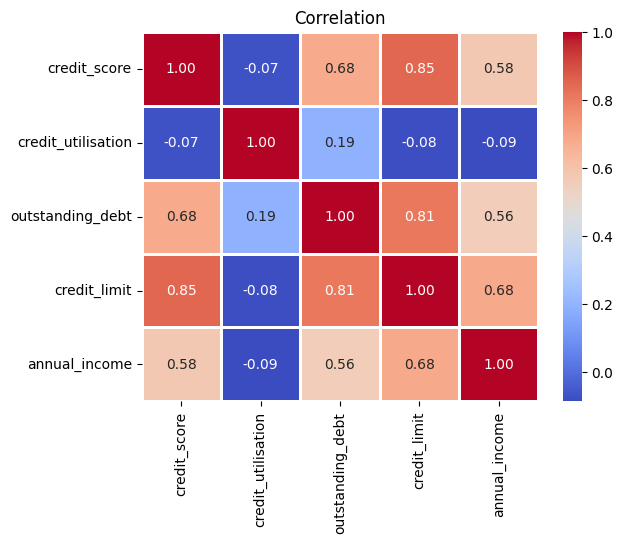

In [78]:
sns.heatmap(correlation_metrix, annot=True, fmt=".2f", cmap="coolwarm",linewidths=0.8)
plt.title("Correlation")
plt.show()

<h2 style="text-align:center;">Exploring Transaction Table</h2>

In [79]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [80]:
df_transactions.shape

(500000, 7)

In [81]:
df_transactions.tran_id.nunique()

500000

## **Data Cleaning : Handle Null Values in Transaction Table**

In [82]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [83]:
df_transactions.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [84]:
df_transactions.product_category.value_counts()

product_category
Electronics               134535
Fashion & Apparel         116892
Kitchen Appliances         57353
Beauty & Personal Care     56065
Sports                     49704
Home Decor                 38355
Garden & Outdoor           23644
Books                      13635
Toys & Games                9817
Name: count, dtype: int64

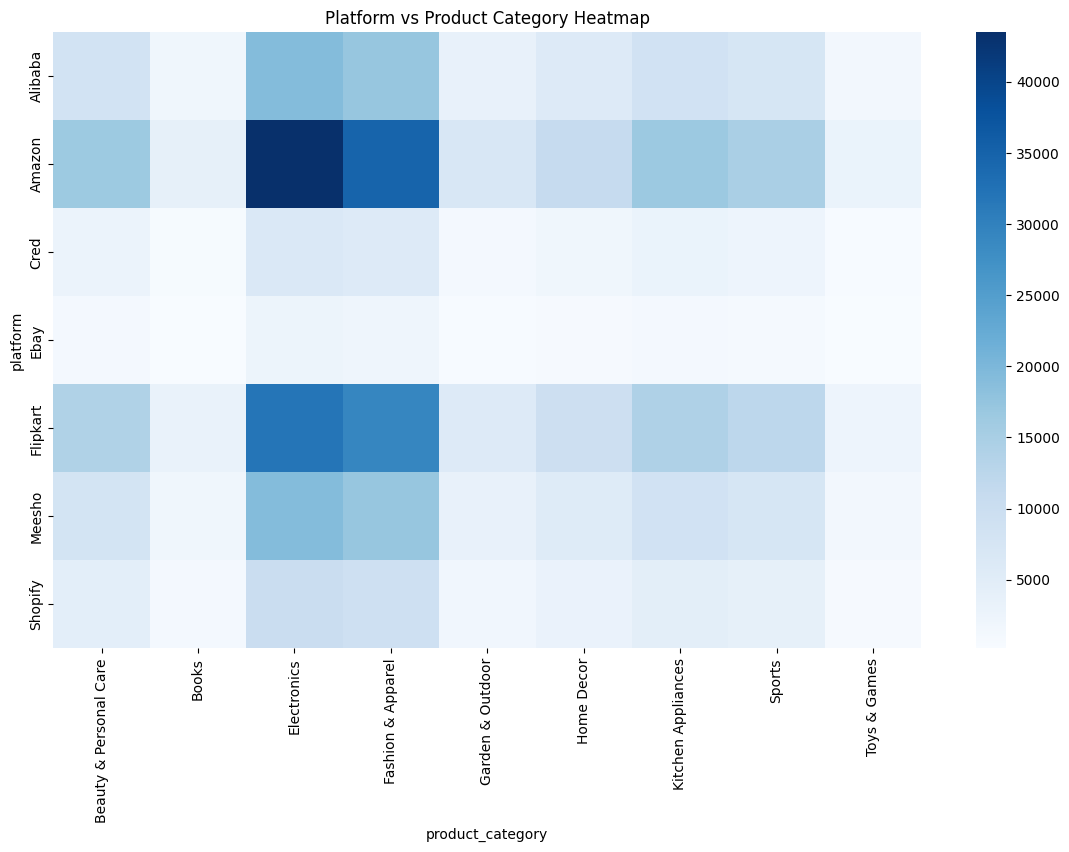

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df_transactions.platform, df_transactions.product_category)

plt.figure(figsize=(14,8))
sns.heatmap(ct, annot=False, cmap="Blues")
plt.title("Platform vs Product Category Heatmap")
plt.show()


In [86]:
df_transactions[df_transactions.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


<Axes: xlabel='count', ylabel='product_category'>

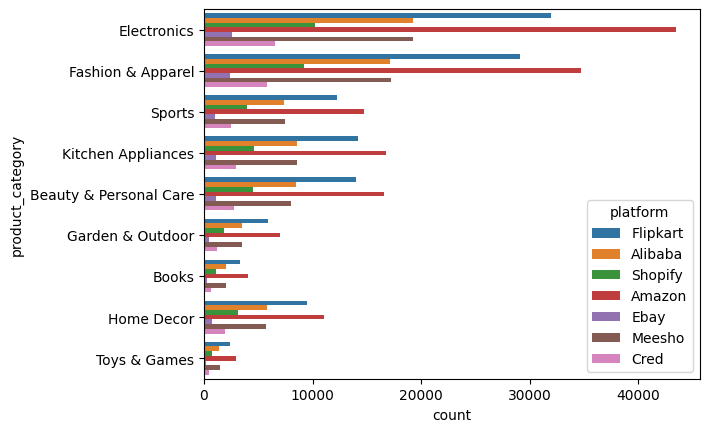

In [87]:
sns.countplot(df_transactions, hue="platform", y="product_category")

In [88]:
df_transactions.platform.mode()[0]

'Amazon'

In [89]:
df_transactions.platform.fillna(df_transactions.platform.mode()[0], inplace=True)

In [90]:
df_transactions[df_transactions.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


## **Data Cleaning : Treating Outliers using IQR(Transaction amount)**

In [91]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [92]:
df_transactions[df_transactions["tran_amount"]==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [93]:
df_transactions[df_transactions["tran_amount"]==0].shape

(4734, 7)

In [94]:
df_transactions[df_transactions["tran_amount"]==0].platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [95]:
df_transactions[df_transactions["tran_amount"]==0].product_category.value_counts()

product_category
Electronics    4734
Name: count, dtype: int64

In [96]:
df_transactions[df_transactions["tran_amount"]==0][["platform","product_category","payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [97]:
df_trans= df_transactions[(df_transactions.platform == "Amazon") & (df_transactions.product_category =="Electronics") & (df_transactions.payment_type =="Credit Card")]
df_trans.shape

(15637, 7)

In [98]:
tran_amount_median=df_trans[df_trans.tran_amount > 0].tran_amount.median()
tran_amount_median

np.float64(554.0)

In [99]:
df_transactions["tran_amount"].replace(0, tran_amount_median, inplace=True)

In [100]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


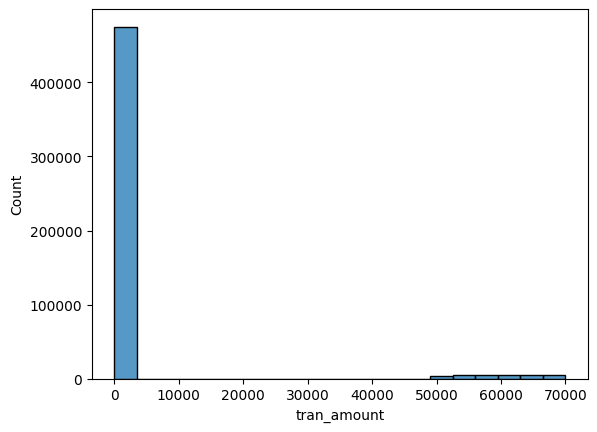

In [101]:
sns.histplot(df_transactions.tran_amount, bins=20)
plt.show()

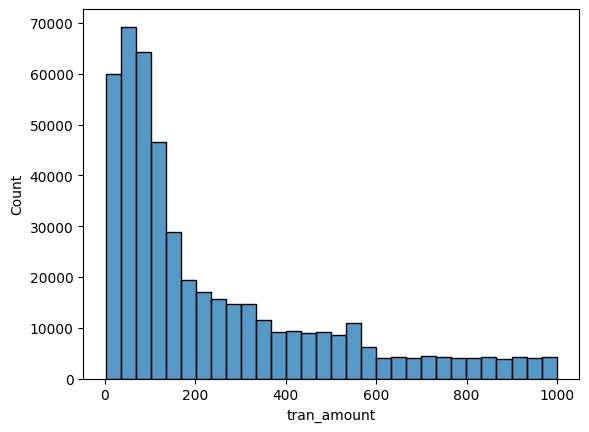

In [102]:
sns.histplot(df_transactions[df_transactions.tran_amount<10000].tran_amount, bins=30)
plt.show()

In [103]:
Q1, Q3 = df_transactions["tran_amount"].quantile([0.25, 0.75])

IQR = Q3 - Q1

lower_ = Q1 - 1.5*IQR
upper_ = Q3 + 1.5*IQR

lower_, upper_

(-454.5, 933.5)

In [104]:
Q1, Q3 = df_transactions["tran_amount"].quantile([0.25, 0.75])

IQR = Q3 - Q1

lower = Q1 - 2*IQR
upper = Q3 + 2*IQR

lower, upper

(-628.0, 1107.0)

In [105]:
tran_outliers= df_transactions[df_transactions.tran_amount > upper]
tran_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [106]:
tran_normal = df_transactions[df_transactions.tran_amount < upper]
tran_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [107]:
tran_mean_per_category = tran_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [108]:
df_transactions.loc[tran_outliers.index, "tran_amount"] = tran_outliers["product_category"].map(tran_mean_per_category)

In [109]:
df_transactions.loc[[26,49]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay


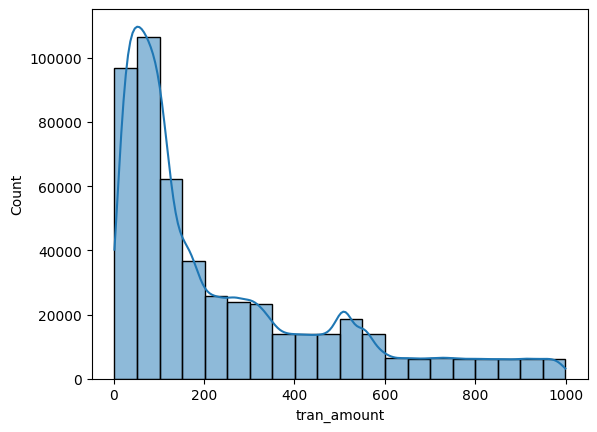

In [110]:
sns.histplot(df_transactions.tran_amount ,kde= True , bins=20)
plt.show()

## **Data Visualization : Transaction Table**

In [111]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

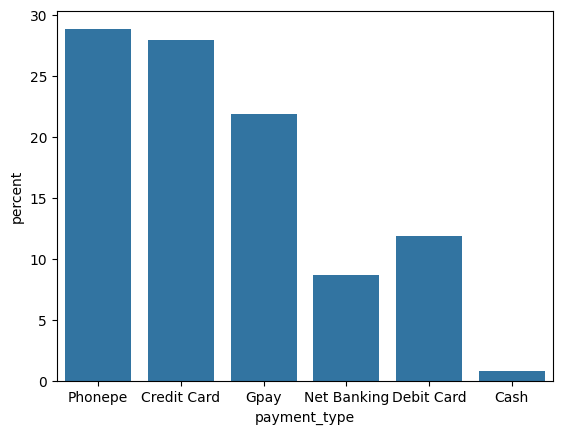

In [112]:
sns.countplot(x=df_transactions.payment_type , stat="percent" )

In [113]:
merge_data_frame = pd.merge(merge_cust_cred, df_transactions, on="cust_id", how="inner")
merge_data_frame.shape

(500000, 21)

In [114]:
merge_data_frame.isnull().sum()

cust_id                           0
name                              0
gender                            0
age                               0
location                          0
occupation                        0
annual_income                     0
marital_status                    0
age_group                         0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
tran_id                           0
tran_date                         0
tran_amount                       0
platform                          0
product_category                  0
payment_type                      0
dtype: int64

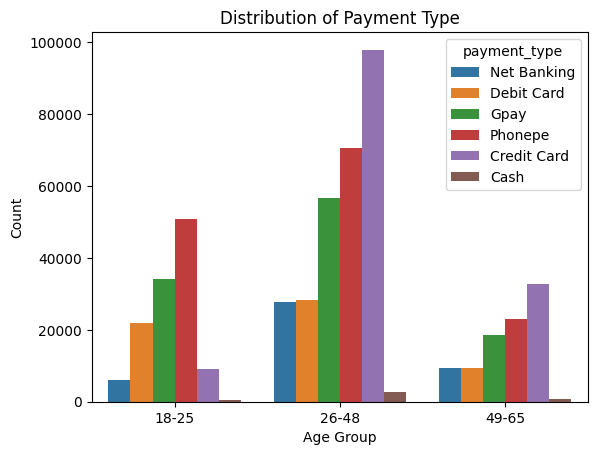

In [115]:
sns.countplot(data = merge_data_frame, x="age_group", hue="payment_type")
plt.title("Distribution of Payment Type")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

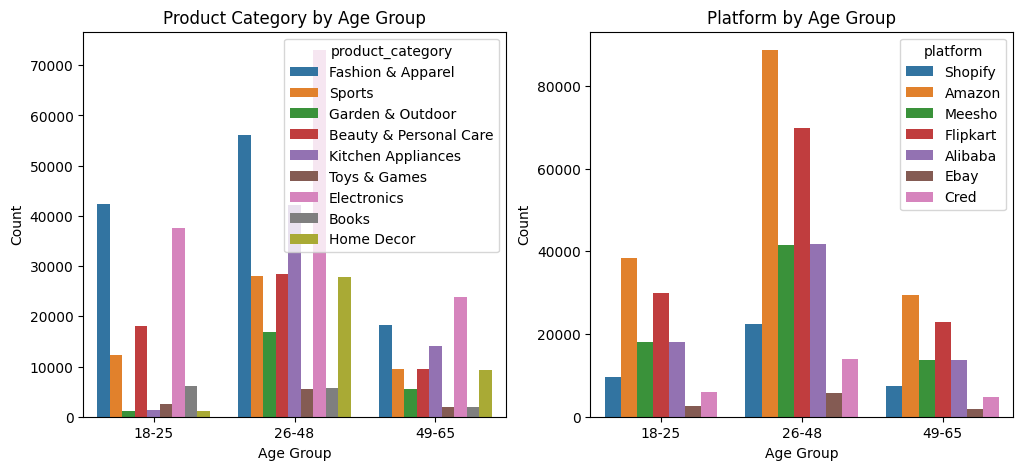

In [116]:
fig,(ax1, ax2) =plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = merge_data_frame, x="age_group", hue="product_category", ax=ax1)
ax1.set_title("Product Category by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
sns.countplot(data = merge_data_frame, x="age_group", hue="platform", ax=ax2)
ax2.set_title("Platform by Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
plt.show()

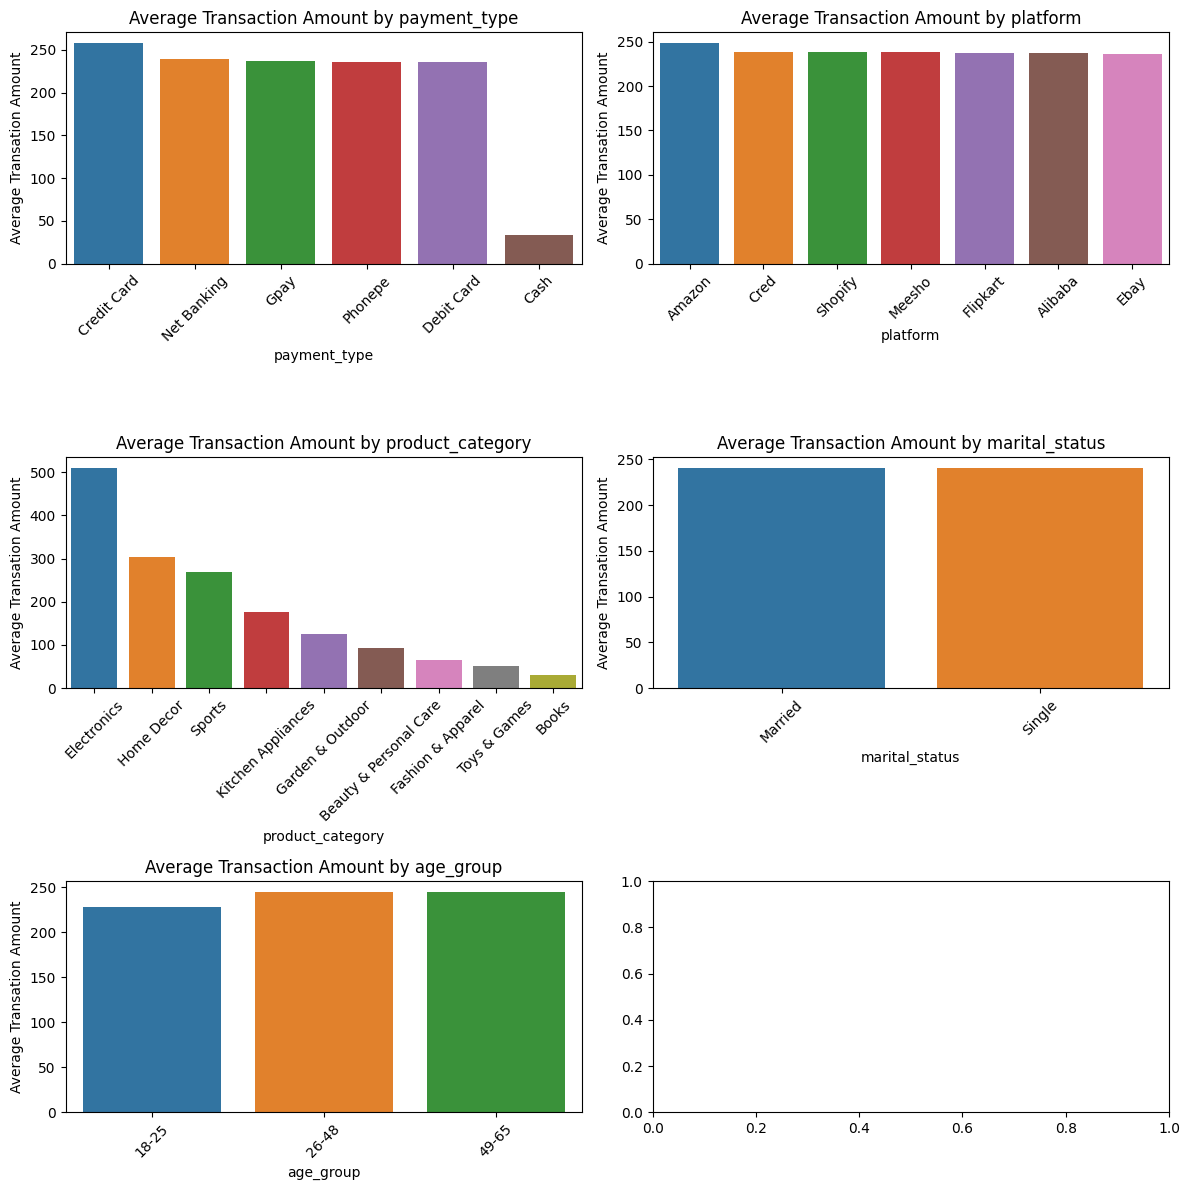

In [117]:
cat_columns =["payment_type","platform","product_category","marital_status","age_group"]
num_rows = 3
fig, axes =plt.subplots(num_rows, 2, figsize=(12,4*num_rows))

axes = axes.flatten()

for i, cat_columns in enumerate(cat_columns):
    avg_tran_amount_category = merge_data_frame.groupby(cat_columns)["tran_amount"].mean().reset_index()
    sorted_data = avg_tran_amount_category.sort_values(by="tran_amount", ascending=False)
    sns.barplot(x=cat_columns,y="tran_amount", data= sorted_data, ci =None, ax=axes[i], palette ="tab10")
    axes[i].set_title(f"Average Transaction Amount by {cat_columns}")
    axes[i].set_xlabel(cat_columns)
    axes[i].set_ylabel("Average Transation Amount")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation =45)
for i in range(len(cat_columns),len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

## **Further Analysis on Age Group**

In [118]:
age_metrix = merge_data_frame.groupby("age_group")[["annual_income","credit_limit","credit_score"]].mean().reset_index()
age_metrix

,age_group,annual_income,credit_limit,credit_score
0,18-25,37138.181054,1137.024545,484.708344
1,26-48,146092.690672,20610.301607,597.918043
2,49-65,260430.658253,41781.734465,701.876810


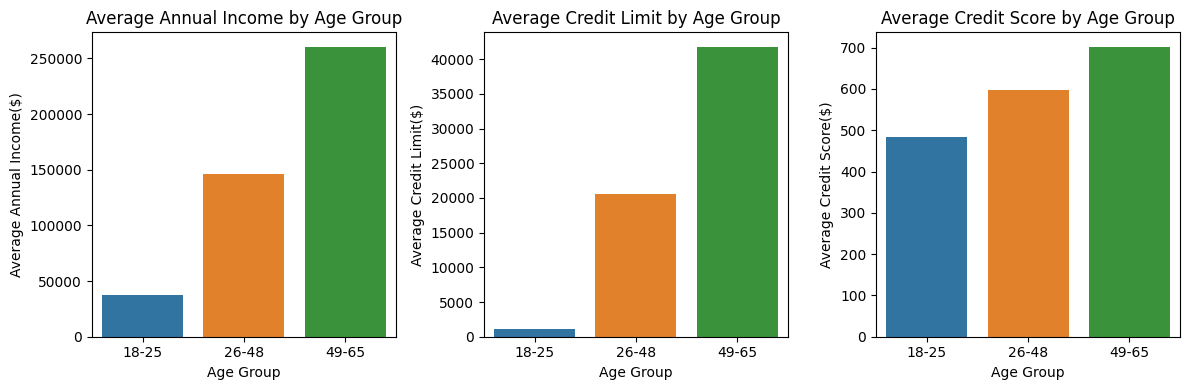

In [119]:
fig, (ax1,ax2,ax3) =plt.subplots(1,3,figsize=(12,4))

sns.barplot(data=age_metrix, x="age_group", y="annual_income", palette="tab10", ax=ax1)
ax1.set_title("Average Annual Income by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Average Annual Income($)")
ax1.tick_params(axis="x", rotation=0)

sns.barplot(data=age_metrix, x="age_group", y="credit_limit", palette="tab10", ax=ax2)
ax2.set_title("Average Credit Limit by Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Average Credit Limit($)")
ax2.tick_params(axis="x", rotation=0)

sns.barplot(data=age_metrix, x="age_group", y="credit_score", palette="tab10", ax=ax3)
ax3.set_title("Average Credit Score by Age Group")
ax3.set_xlabel("Age Group")
ax3.set_ylabel("Average Credit Score($)")
ax3.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

## **Insights & Interpretations**
- Students have lower income & higher digital payments → Student Card
- Professionals have stable income → Cashback Card
- Salespeople show travel patterns → Travel Card
- Business owners show income variance → Premium Card